# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import os, shutil

# Create Directory to Save All Images

In [2]:
#set directory
save_folder = './images/'

#check if the directory already exists
if os.path.exists(save_folder):
    #if the directory exists, delete 
    shutil.rmtree(save_folder)
#create directory
os.makedirs(save_folder)

# 1. Toy Problem [1], [2]

## Function Definition

In [3]:
#define square function
def sq(x):
    return math.pow(x,2)

## Visualization of Datapoints

In [4]:
# k-means cluster 
points_df = pd.DataFrame({'x':[2,2,8,5,7,6,1,4],
                         'y':[10,5,4,8,5,4,2,9],
                         'label':[0,0,0,0,0,0,0,0]})

points_df

,x,y,label
0,2,10,0
1,2,5,0
2,8,4,0
3,5,8,0
4,7,5,0
5,6,4,0
6,1,2,0
7,4,9,0


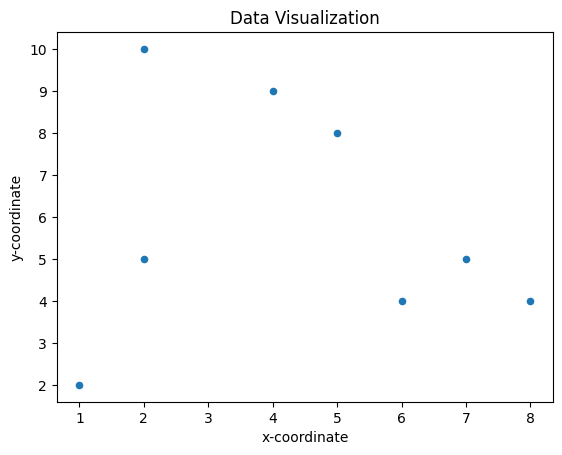

In [5]:
points_df.plot(kind='scatter', x= 'x', y='y')
plt.title('Data Visualization')
plt.savefig('./images/Toy_Problem1_Data_Visualization', dpi = 200)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

# Initial Centroid Visualization

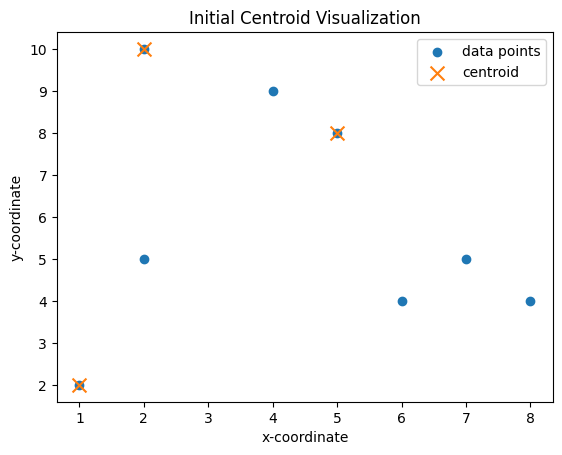

In [6]:
centroid_list = [[2,10], [5,8],[1,2]]

plt.scatter(points_df.iloc[:,0], points_df.iloc[:,1], label = 'data points')
plt.scatter([xi for xi,yi in centroid_list], [yi for xi,yi in centroid_list],
            marker = 'x', s = 100, label = 'centroid')
plt.legend()
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Initial Centroid Visualization')
plt.savefig('./images/Initial Centroid Visualization.png', dpi = 200)
plt.show()

In [7]:
centroid_list = [[xi,yi] for xi,yi in zip(points_df.iloc[:,0],points_df.iloc[:,1])]
centroid_list 

[[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]

## Define User-defined K-Means Algorithm Function

In [8]:
#set random seed
random.seed(10000)

"""
points_df: data points in dataframe format
max_iteration: maximum number of iterations 
k: number of clusters
"""
# step1. Specify the number of clustes(k) and the maximum number of iterations
def my_kmeans(points_df, max_iteration, k): 
    
    #step2. intial centroid list
    
    #method1: user-defined centroid initialization
    #centroid_list = [[2,10], [5,8],[1,2]] 
    
    #method2: random sampling from the datapoints for centroid initialization
    centroid_list = [[xi,yi] for xi,yi in zip(points_df.iloc[:,0],points_df.iloc[:,1])]
    centroid_list = random.sample(centroid_list, k)
    
    #dictionary to save the distance between a datapoint and a centroid
    dict_label    = {}

    #iterate for the maximum number of iterations unless termination condition is satisfied
    for i in range(max_iteration): 
        
        #cent_x: x coordinates of the centroids
        cent_x = [xi for xi, yi in centroid_list]
        #cent_y: y coordinates of the centroids
        cent_y = [yi for xi, yi in centroid_list]
        #scatter plot visualization of the centroids
        plt.scatter(cent_x, cent_y, marker = 'x', s = 100, label = 'iteration: {}'.format(i))
        
        print("==================================================================================")
        print(f'iteration: {i}') 
        
        for j in range(0, len(points_df)): # Iterate for each datapoints 
            for n in range(k): # Iterate for the number of clusters
                #calculate the euclidean distance between the centroid and the datapoint
                d = math.sqrt(sq(centroid_list[n][0] - points_df.iloc[j,0]) + 
                              sq(centroid_list[n][1] - points_df.iloc[j,1]))
                
                #save cluster number as the dictionary 'key' and the distance as its respective value. 
                dict_label[n] = d

            #update the datapoints label as the key with the smallest distance. 
            label = min(dict_label, key=dict_label.get)
            points_df['label'][j] = label


        # step4. Recalculate centroid points by taking the average of all points in a cluster
        centroid_list_old = []  # list of centroids prior to update 
        # iterate for number of clusters
        for n in range(k):
            print(f'centroid {n}: {centroid_list[n][0],centroid_list[n][1]}')
            centroid_list_old.insert(n, [centroid_list[n][0], centroid_list[n][1]])

            xlist = [] 
            xlist = list(points_df[points_df['label'] == n]['x'])
            centroid_list[n][0] = round(sum(xlist)/len(xlist),2)

            ylist = [] 
            ylist = list(points_df[points_df['label'] == n]['y'])
            centroid_list[n][1] = round(sum(ylist)/len(ylist),2)

        if centroid_list_old != centroid_list :
            print("----------------Centroid List-----------------")
            print(f'Before:{centroid_list_old} \n After:{centroid_list}')
            print('Repeat until the center point is no longer moving.')

        else: 
            print("----------------Centroid List-----------------")
            print(f'Before:{centroid_list_old} \n After:{centroid_list}')
            print('The center point is no longer moving. Ends the iteration.')
            print(f'Best center point found in {i} iterations.')
            break

    #disply legend
    plt.legend()
    #set x and y axis title
    plt.xlabel('x-coordinate'), plt.ylabel('y-coordinate')
    #scatter plot visualization of the datapoints
    plt.scatter(points_df.iloc[:,0], points_df.iloc[:,1])
    #set plot title
    plt.title('Progression of the Centroids')
    #save visualization as png file
    plt.savefig('./images/Progression of the Centroids.png', dpi = 200)
    plt.show()
    
    return points_df, centroid_list

iteration: 0
centroid 0: (7, 5)
centroid 1: (2, 10)
centroid 2: (6, 4)
----------------Centroid List-----------------
Before:[[7, 5], [2, 10], [6, 4]] 
 After:[[6.67, 5.67], [3.0, 9.5], [3.0, 3.67]]
Repeat until the center point is no longer moving.
iteration: 1
centroid 0: (6.67, 5.67)
centroid 1: (3.0, 9.5)
centroid 2: (3.0, 3.67)
----------------Centroid List-----------------
Before:[[6.67, 5.67], [3.0, 9.5], [3.0, 3.67]] 
 After:[[7.0, 4.33], [3.67, 9.0], [1.5, 3.5]]
Repeat until the center point is no longer moving.
iteration: 2
centroid 0: (7.0, 4.33)
centroid 1: (3.67, 9.0)
centroid 2: (1.5, 3.5)
----------------Centroid List-----------------
Before:[[7.0, 4.33], [3.67, 9.0], [1.5, 3.5]] 
 After:[[7.0, 4.33], [3.67, 9.0], [1.5, 3.5]]
The center point is no longer moving. Ends the iteration.
Best center point found in 2 iterations.


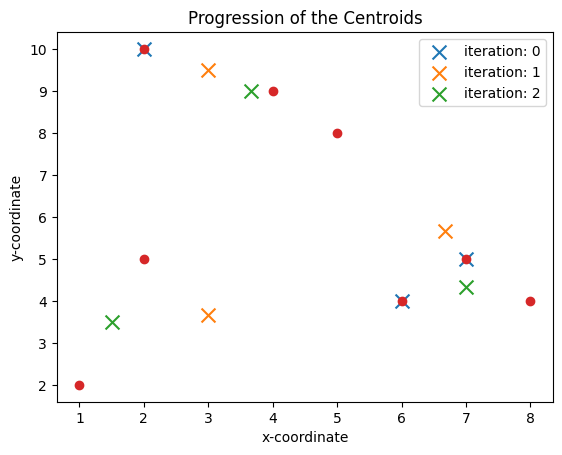

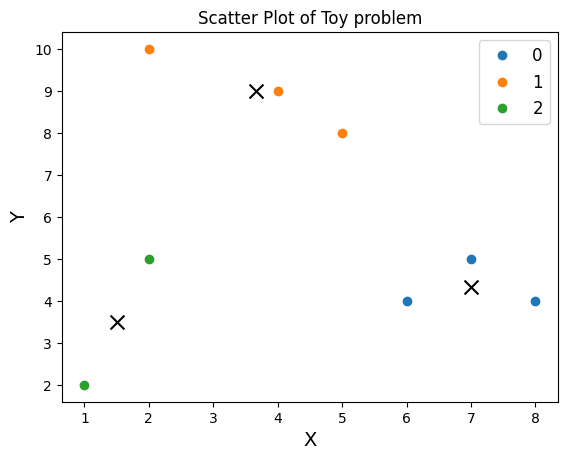

In [9]:
# implement K-Means Clustering
points_df, centroid_list = my_kmeans(points_df, 100, 3)


## Plot 
clusters = points_df.groupby('label')

# Create an object to draw a graph
fig, ax = plt.subplots()

for cluster_number, cluster in clusters : 
    ax.plot(cluster.x, cluster.y,
           marker = 'o', 
           linestyle = '',
           label = cluster_number)
    
x = [xi for xi,yi in centroid_list]
y = [yi for xi,yi in centroid_list]
plt.scatter(x = x, y = y, marker='x', color='black', s = 100)
    
ax.legend(fontsize=12, loc='upper right')
plt.title('Scatter Plot of Toy problem')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.savefig('./images/Clustering Results.png', dpi = 200)
plt.show()

# 2. Dividing South Korea into k number of equal parts

## Read Datafiles

In [10]:
#read borderline coordinate dataset
sk_territory = pd.read_csv('South_Korea_territory.csv')

#read vertiport coordinate dataset
vertiport = pd.read_csv('Vertiport_candidates.csv')

#eliminate duplicates
vertiport = vertiport.drop_duplicates()

#convert vertiport to numpy format
vertiport_np = np.asarray(vertiport)

#convert vertiport to pandas dataframe format
vertiport_pd = pd.DataFrame(vertiport)

FileNotFoundError: [Errno 2] No such file or directory: 'South_Korea_territory.csv'

## Check for duplicates

In [ ]:
vertiport.value_counts()

In [94]:
sk_territory

,Longitude (deg),Latitude (deg)
0,128.364919,38.624335
1,128.394784,38.578074
2,128.441417,38.505805
3,128.450694,38.474107
4,128.474457,38.426093
...,...,...
1588,128.276955,38.554056
1589,128.274785,38.571497
1590,128.281089,38.584416
1591,128.308374,38.601340


## Uniformly Distributed Datapoints on the map

In [95]:
max_lon = max(sk_territory.iloc[:,0]) #maximum longitude value 
min_lon = min(sk_territory.iloc[:,0]) #minimum longitude value
max_lat = max(sk_territory.iloc[:,1]) #maximum latitude value
min_lat = min(sk_territory.iloc[:,1]) #minimum latitude value

In [96]:
unif_x = np.linspace(min_lon, max_lon, 100) #uniformly distributed points between min_lon and max_lon
unif_y = np.linspace(min_lat, max_lat, 100) #uniformly distributed points between min_lat and max_lat
unif_coord = [(xi, yi) for xi in unif_x for yi in unif_y] #create datapoints that are uniformly distributed across the map

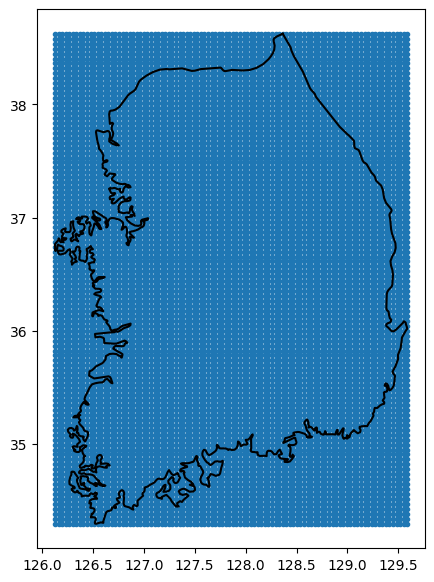

In [97]:
#Visualization of the uniformly distributed datapoints
plt.figure(figsize = (5,7))
plt.plot(sk_territory.iloc[:,0], sk_territory.iloc[:,1], color = 'black')
plt.scatter([xi for xi, yi in unif_coord], [yi for xi, yi in unif_coord], marker = '.')
plt.show()

## Select points surrounded by the South Korean Territory [3]

In [98]:
#import libraries 
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [99]:
#define polygon
polygon = [(xi, yi) for xi, yi in zip(sk_territory.iloc[:,0], sk_territory.iloc[:,1])]
polygon = Polygon(polygon)

#create an empty list to store all the points surrounded by the South Korea borderline
point_in_sk = []

#iterate for each points and save the point into the list if it is inside the borderline
for xi, yi in unif_coord:
    point = Point([(xi, yi)])
    if polygon.contains(point) == True:
        point_in_sk.append((xi, yi))

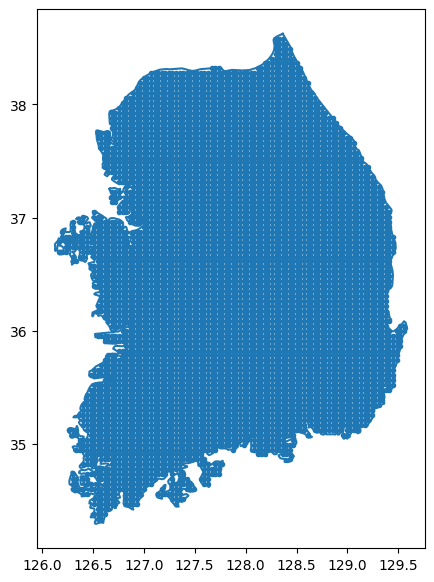

In [100]:
#visualization of points surrounded by the South Korean Borderline
plt.figure(figsize = (5,7))
plt.plot(sk_territory.iloc[:,0], sk_territory.iloc[:,1])
plt.scatter([xi for xi, yi in point_in_sk], [yi for xi, yi in point_in_sk], marker = '.')
plt.show()

## User-defined Function: find_group

In [101]:
"""
find_group: user-defined function which returns a list of cluster numbers which 
the data points belongs to

point_in_sk: x, y coordinates inside South Korea

x: x-coodrinates of the centroids
y: y-coordinates of the centroids
"""
def find_group(point_in_sk, x, y):
    group_ls = [] #group list
    #iterate for each longitude and latitude coordinates in the vertiport dataset
    for lat, lon in point_in_sk:
        #distance list
        dist_ls = []
        #iterate for each longitude and latitude coordinates of centroids
        for xi, yi in zip(x,y):
            #calculate euclidean distance between two coordinates
            dist = np.sqrt((xi-lat)**2 + (yi-lon)**2)
            #append distance to distance list
            dist_ls.append(dist)
        #append index with the lowest distance value
        group_ls.append(np.argmin(dist_ls))
    #return group list
    return group_ls

## User-defined Function: cal_MSE

In [102]:
"""
cal_MSE: user-defined function which returns the mean squared error between
the a single datapoint and a centroid

"""
def cal_MSE(point_in_sk, x, y):
    SE_ls = [] #Mean Squared Error list
    #iterate length-of-x times
    for i in range(len(x)):
        #calculate Squared Error for x coordinates
        x_SE = np.square(point_in_sk[point_in_sk['group'] == i].iloc[:,0] - x[i])
        #calculate Squared Error for y coordinates
        y_SE = np.square(point_in_sk[point_in_sk['group'] == i].iloc[:,1] - y[i])
        #calculate total squared error
        SE = x_SE + y_SE
        #append mean squared error to mean squared error list
        SE_ls.append(SE)
    #return mean squared error list
    return np.mean(SE)

## User-defined Function: KMeansClustering

In [103]:
def KMeansClustering(point_in_sk, sk_territory, k = 17, iteration = 20):
    np.random.seed(2023)
    random.seed(2023)
    
    MSE_ls = []
    
    point_in_sk_pd = pd.DataFrame(point_in_sk)
    point_in_sk_np = np.array(point_in_sk)

    x = random.sample(list(point_in_sk_np[:,0]), k)
    y = random.sample(list(point_in_sk_np[:,1]), k)

    for i in range(iteration):
        point_in_sk_pd['group'] = find_group(point_in_sk_np, x, y)

        MSE_ls.append(cal_MSE(point_in_sk_pd, x, y))

        x, y = [], []
        for i in range(k):
            x_new = np.mean(point_in_sk_pd[point_in_sk_pd['group'] == i].iloc[:,0], axis = 0)
            y_new = np.mean(point_in_sk_pd[point_in_sk_pd['group'] == i].iloc[:,1], axis = 0)
            x.append(x_new), y.append(y_new)
    fig, axis = plt.subplots(1,2, width_ratios= [3,2], figsize=(10, 5))

    axis[0].plot(MSE_ls)
    axis[0].set_xticks([i for i in range(iteration) if i%5 == 0])
    axis[0].set_ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
    axis[0].set_xlabel('Iteration')
    axis[0].set_title('Within-Cluster-Sum of Squared Errors (WSS) plot, k: {}'.format(k))

    axis[1].plot(sk_territory.iloc[:,0], sk_territory.iloc[:,1])
    for i in range(k):
        axis[1].scatter(point_in_sk_pd[point_in_sk_pd['group']==i].iloc[:,0],
                        point_in_sk_pd[point_in_sk_pd['group']==i].iloc[:,1], marker = '.')
    axis[1].scatter(x,y, marker = '*', color = 'black')
    axis[1].set_ylabel('Latitude (deg)')
    axis[1].set_xlabel('Longitude (deg)')
    axis[1].set_title('Cluster Visualization, k: {}'.format(k))    

    plt.savefig('./images/KMeansClutering, K = {}'.format(k), dpi = 300)
    plt.show()
    
    return x, y, MSE_ls[-1]

## Visualize K-Means Clustering from K = 1 ~ 17

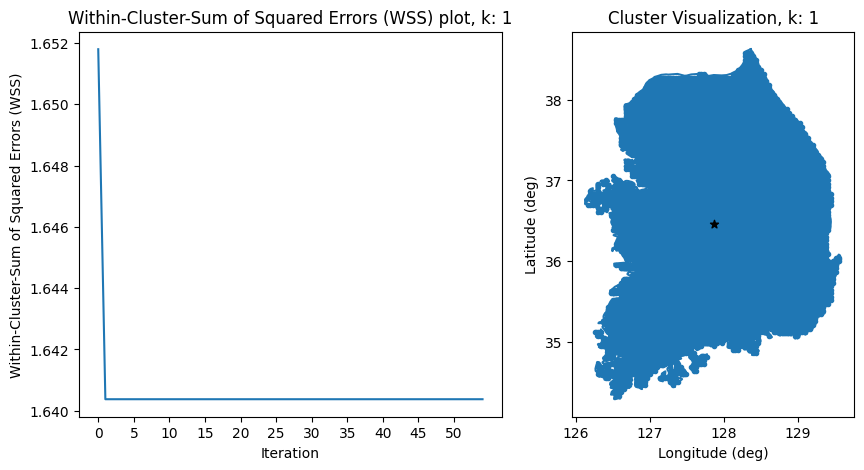

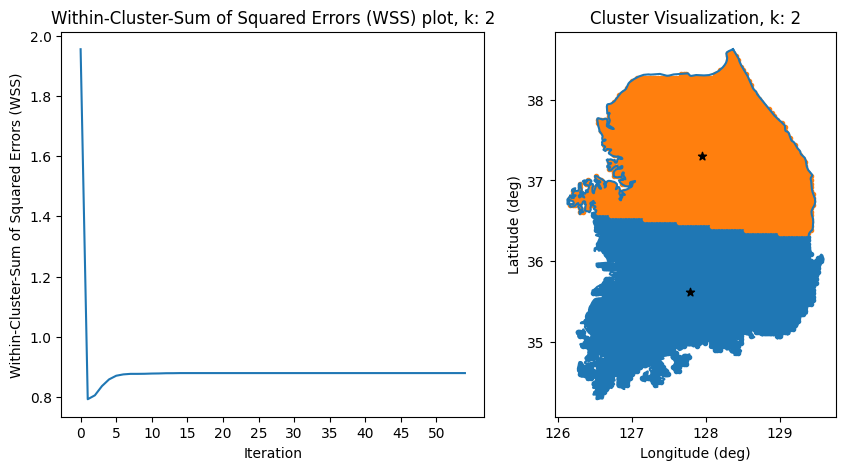

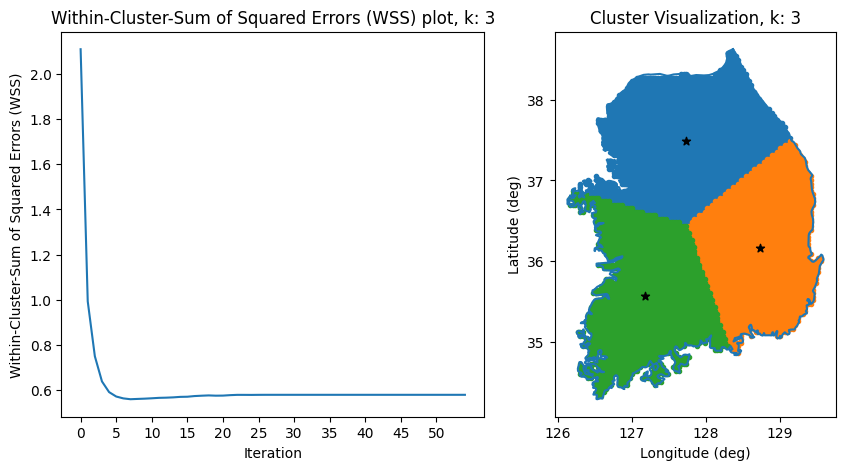

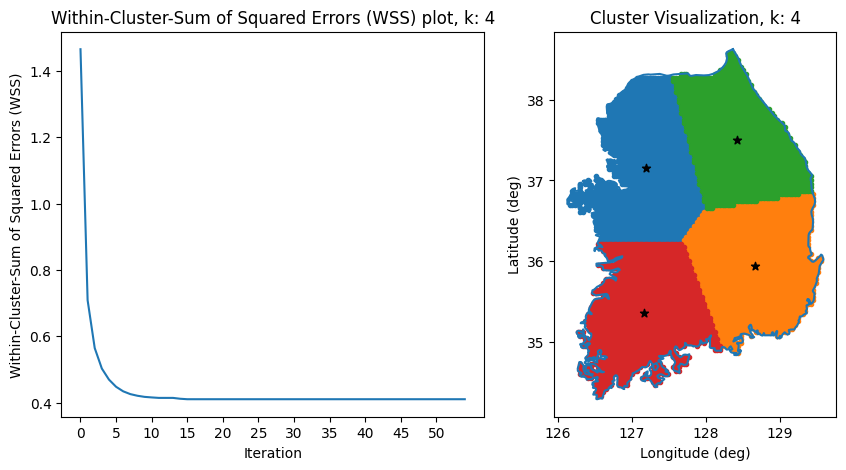

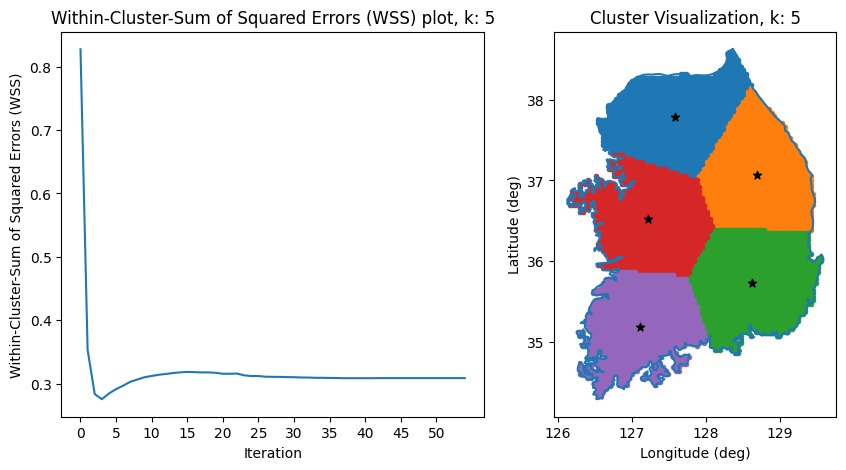

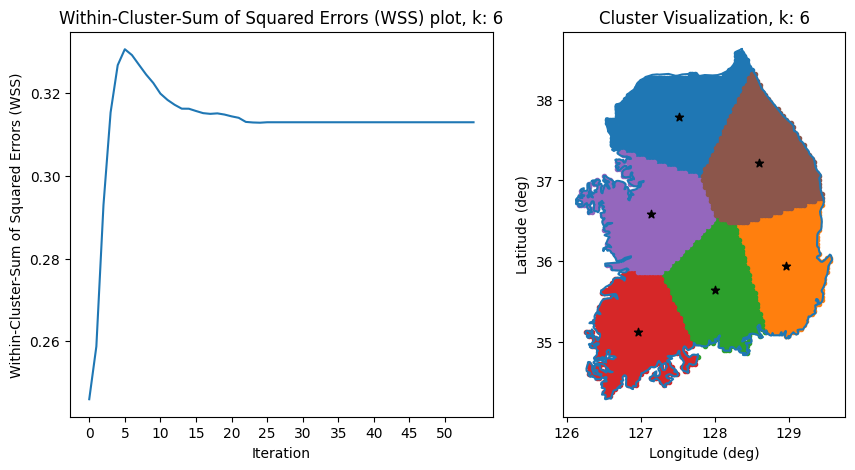

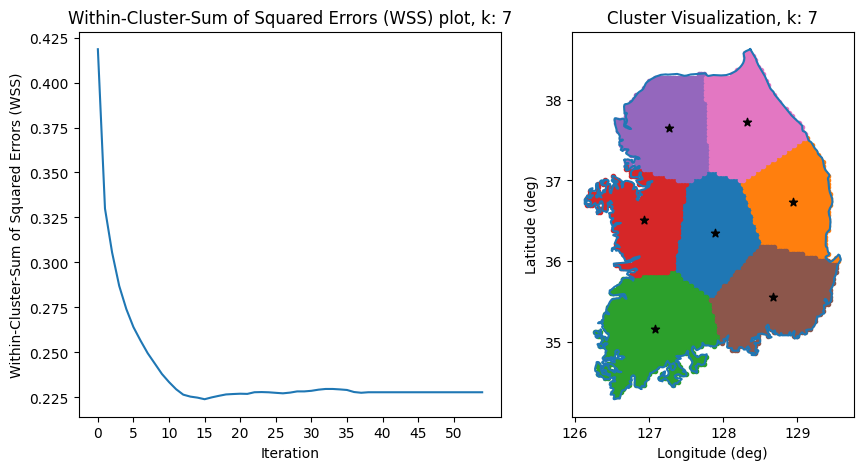

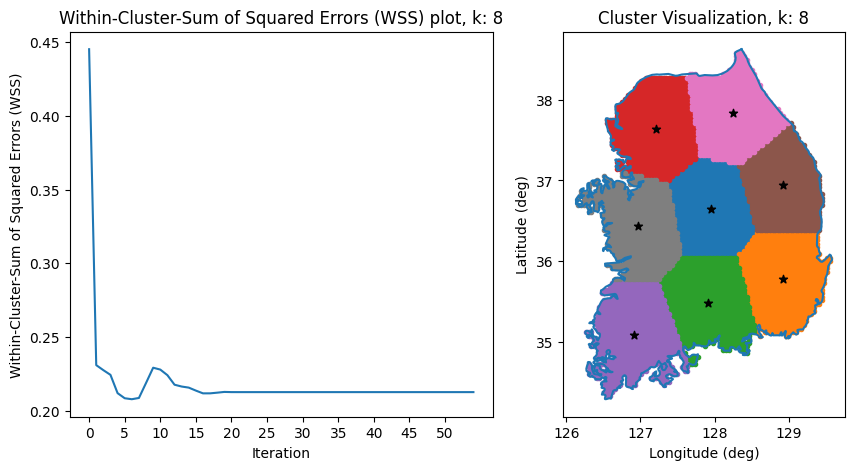

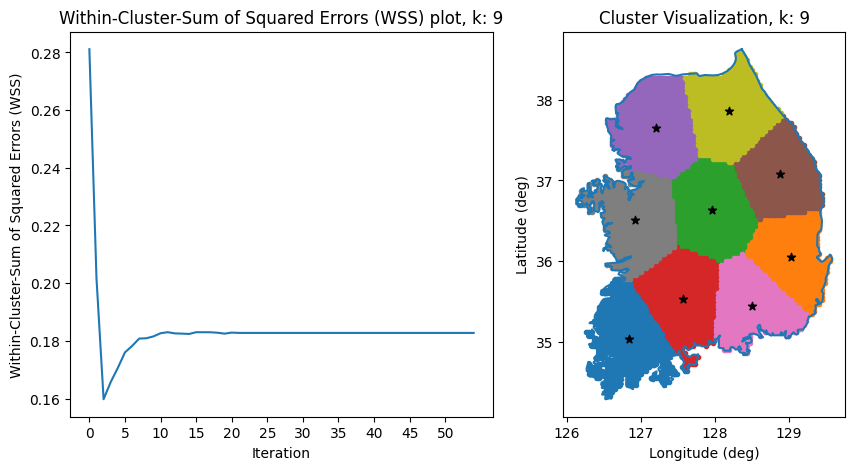

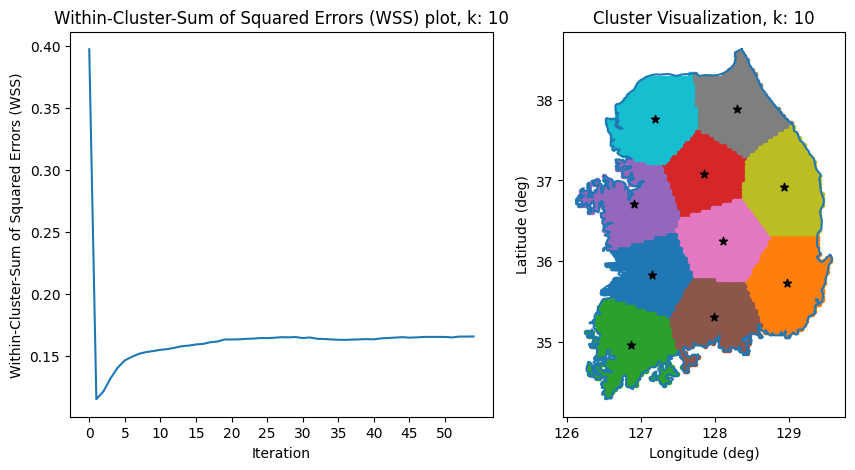

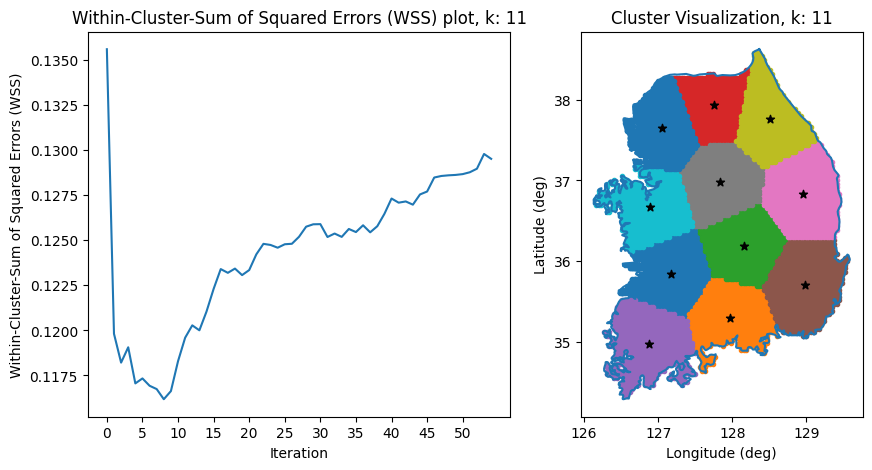

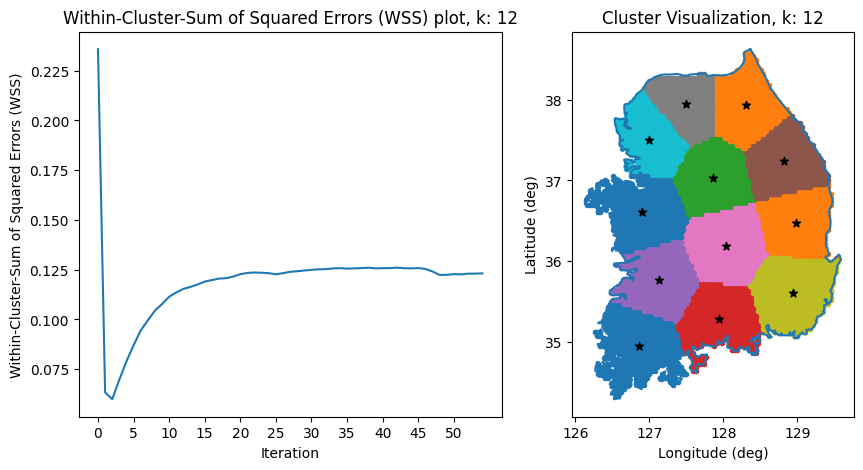

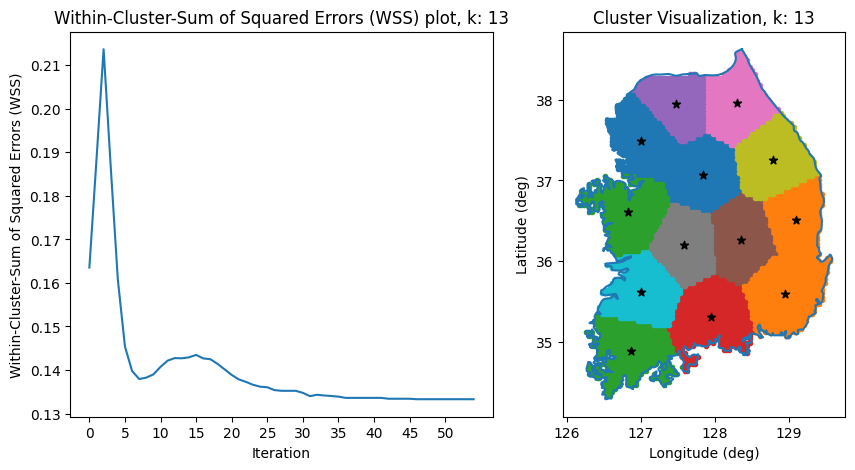

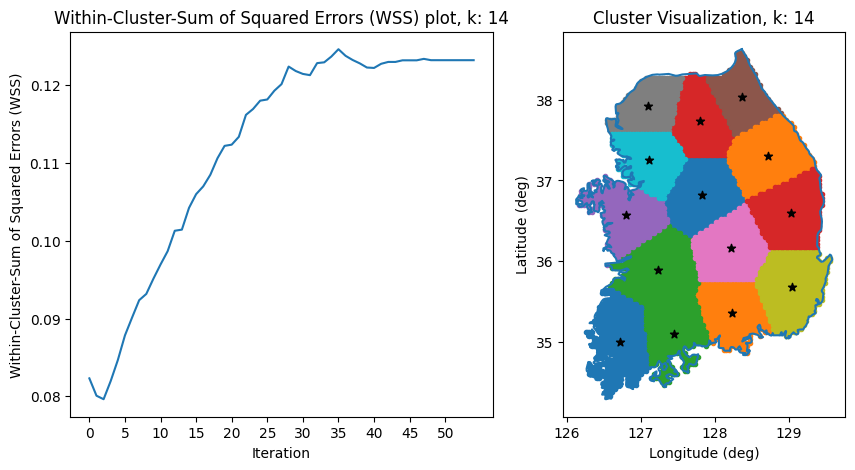

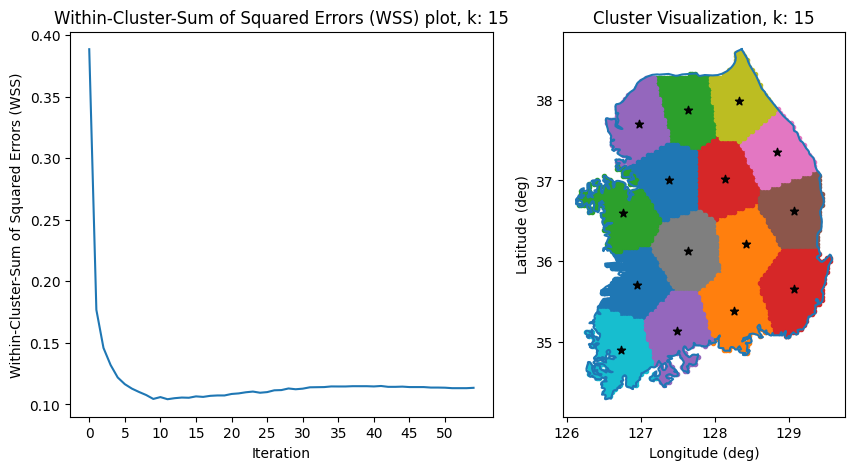

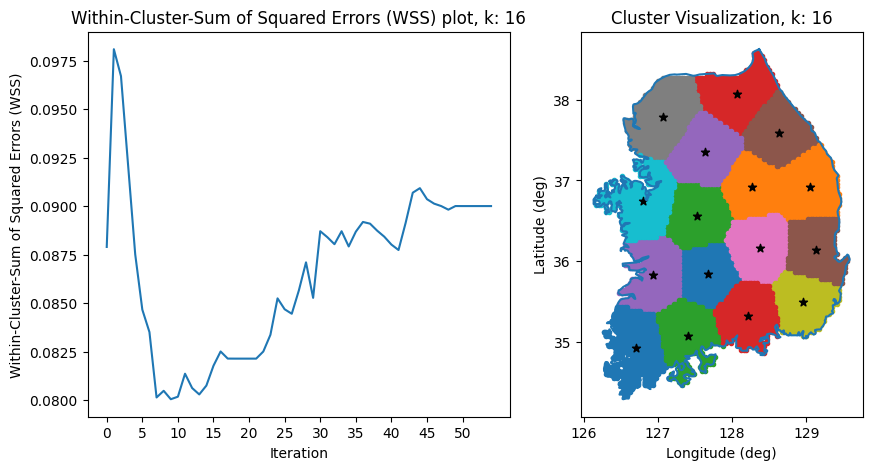

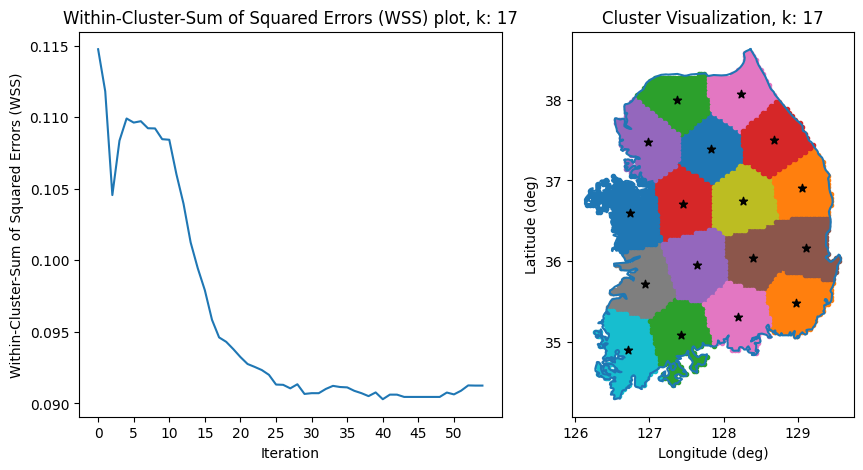

In [105]:
xny_list = []
MSE_ls = []
for i in range(1,18,1):
    x, y, MSE = KMeansClustering(point_in_sk, sk_territory, k = i, iteration = 55)
    xny_list.append((x,y)), MSE_ls.append(MSE)

## Selecting K [4]

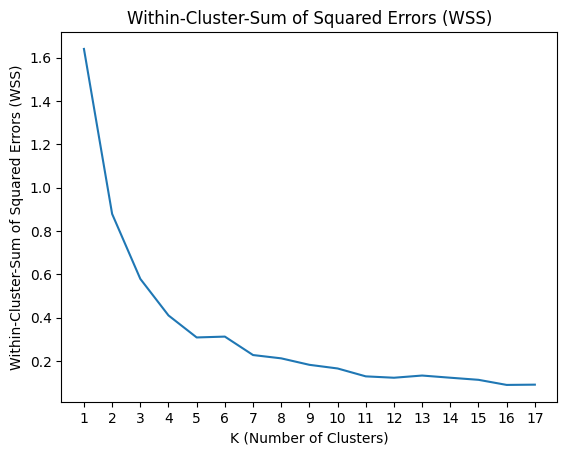

In [123]:
plt.plot(MSE_ls)
plt.title('Within-Cluster-Sum of Squared Errors (WSS)')

ax = plt.subplot()
ax.set_xticks(range(17))
ax.set_xticklabels([i +1 for i in range(17)])

plt.xlabel("K (Number of Clusters)")
plt.ylabel("Within-Cluster-Sum of Squared Errors (WSS)")
plt.show()

## Vertiport Candidate Selection

To get the coordinates of the centroids at k, 
run the code "xny_list[k-1]". 

For instance, to get the centroid 
coordinates at k = 4, run the code xny_list[3]

In [124]:
xny_list[5]

([127.51464645786285,
  128.9609411366473,
  128.00372998248037,
  126.96476450242983,
  127.13643622023052,
  128.60143082896175],
 [37.785428171262865,
  35.93703800351588,
  35.645195755586336,
  35.12912568721653,
  36.58079096666245,
  37.215111456847744])

## Hyperparameter Settings

In [125]:
k = 4 #k value for k-means clustering
number_of_neighbors = 10 #number of neighbors

## Print Nearest Neighboring Vertiport Candidates for each centroid

In [126]:
knn_ls = [] #list that saves K-nearest neighbor points

#iterate for each x,y coordinates of the centroids
for x, y in zip(list(xny_list[k])[0], list(xny_list[k])[1]): 
    dist_ls = [] #distance list
    vertiport_pd = pd.DataFrame(vertiport) #vertiport dataframe
    #iterate for each longitude and latitude in the vertiport 
    for lon, lat in zip(vertiport.iloc[:,0], vertiport.iloc[:,1]):
        #calculate distance between vertiport candidate and centroid
        dist = np.sqrt(np.square(lon-x) + np.square(lat-y))
        #append distance to distance list
        dist_ls.append(dist)
    #create a new column named 'distance' to the vertiport dataframe
    vertiport_pd['distance'] = dist_ls
    #sort the vertiport candidates by distance from the centroid
    vertiport_pd = vertiport_pd.sort_values(by = 'distance', ascending = True)
    #print vertiport candidates nearest to the centroids
    print("{} Nearest Vertiports for Centroid {},{}: ".format(number_of_neighbors,x,y))
    for i in range(number_of_neighbors):
        print(vertiport_pd.iloc[i, 0], vertiport_pd.iloc[i,1])
        knn_ls.append((vertiport_pd.iloc[i,0], vertiport_pd.iloc[i,1]))
    print()

10 Nearest Vertiports for Centroid 127.5855257436917,37.78021877299466: 
127.5248507123677 37.77798686891872
127.4921402895598 37.69514149212
127.41985915952598 37.82212693000587
127.75908103042632 37.81784746790417
127.58751030420076 37.97224524760389
127.58824724015268 37.98978407567104
127.3783287301284 37.87857763345995
127.36680817785007 37.70797882971207
127.351541512092 37.79203100352012
127.76415978236886 37.61067225033755

10 Nearest Vertiports for Centroid 128.69610574306674,37.06978146006069: 
128.69616494920407 37.00114433079155
128.6100761885733 36.990448348195855
128.83137025875763 37.18559707506109
128.55646358509196 36.949182615356975
128.4970551914755 37.170947542798494
128.9586783508462 37.06627264571588
128.77174211390215 36.81629224144243
128.99782611087895 37.066449943724486
128.55287297393923 37.34725680515822
128.81812599580635 37.37711115059968

10 Nearest Vertiports for Centroid 128.62601966631718,35.729648677224375: 
128.61911157851623 35.75192575417724
128.61

## Nearest Neighbor Visualization [5]

In [127]:
airport_coord = pd.read_csv('airport_coordinate.csv', encoding='cp949')

In [128]:
# import folium package
import folium
 
# Map method of folium return Map object
 
# Here we pass coordinates of Gfg
# and starting Zoom level = 12
my_map1 = folium.Map(location = [36.638392, 127.6961188],
                                        zoom_start = 7 )
for lon, lat in knn_ls:
    folium.Marker([lat, lon],popup = '{},{}'.format(lat,lon)).add_to(my_map1)

for lat, lon in airport_coord.iloc[:,2:4].values:
    folium.Marker([lat, lon], icon = folium.Icon(color='red', icon='plane', prefix='fa')).add_to(my_map1)
# save method of Map object will create a map
my_map1.save("my_map1.html" )

In [129]:
my_map1

In [140]:
xny_list[4][0]

[127.5855257436917,
 128.69610574306674,
 128.62601966631718,
 127.21469464736774,
 127.10623286231436]

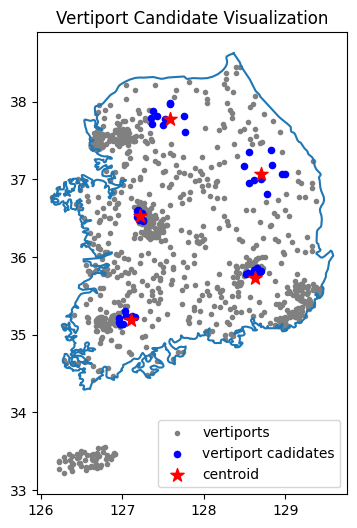

In [146]:
#set figure size
plt.figure(figsize=(4,6))

#plot borderline
plt.plot(sk_territory.iloc[:,0], sk_territory.iloc[:,1])

#plot vertiport
plt.scatter(vertiport.iloc[:,0], vertiport.iloc[:,1], marker = '.', c = 'grey', label = 'vertiports')
plt.scatter([x for x,y in knn_ls], [y for x,y in knn_ls], c = 'blue', s = 20, label = 'vertiport cadidates')

#plot centroids
plt.scatter(xny_list[k][0], xny_list[k][1], marker = '*', 
            s = 100, c = 'red', label = 'centroid')
plt.legend()
plt.title('Vertiport Candidate Visualization')
plt.savefig('./images/10 Nearest Veriports from the Centroids.png', dpi = 200)
plt.show()

In [148]:
vertiport.iloc[:,0:2].values

array([[126.94019713,  37.62187588],
       [127.09629161,  37.53575616],
       [126.93943181,  37.49201994],
       ...,
       [126.35367774,  33.29005794],
       [126.63871055,  33.3825131 ],
       [126.90403946,  33.46140195]])

# 3. Vertiport Visualization

In [149]:
# Map method of folium return Map object
 
my_map2 = folium.Map(location = [36.638392, 127.6961188],
                                        zoom_start = 7 )
for lon, lat in vertiport.iloc[:,0:2].values:
    folium.Circle([lat, lon],
                  popup = '{},{}'.format(lat,lon),
                  icon = folium.Icon(color = 'yellow', icon = 'helicopter', prefix = 'fa')).add_to(my_map2)

# save method of Map object will create a map
my_map1.save("my_map2.html" )

/var/folders/8m/t64737c57hjccwv7v64px3fh0000gn/T/ipykernel_20048/4085337569.py:8: UserWarning: color argument of Icon should be one of: {'darkblue', 'beige', 'white', 'red', 'pink', 'lightblue', 'darkpurple', 'lightgreen', 'black', 'lightred', 'purple', 'lightgray', 'darkgreen', 'darkred', 'green', 'cadetblue', 'gray', 'orange', 'blue'}.
  icon = folium.Icon(color = 'yellow', icon = 'helicopter', prefix = 'fa')).add_to(my_map2)


In [150]:
my_map2

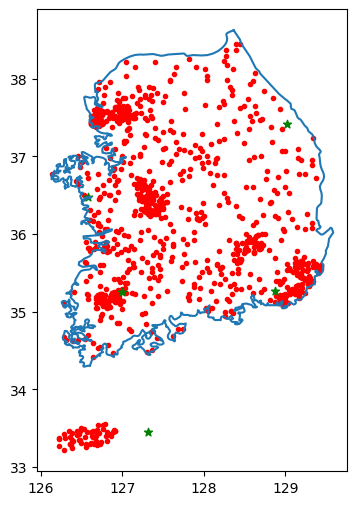

In [153]:
#set figure size
plt.figure(figsize=(4,6))

#plot borderline
plt.plot(sk_territory.iloc[:,0], sk_territory.iloc[:,1])

#plot vertiport
plt.scatter(vertiport.iloc[:,0], vertiport.iloc[:,1], marker = '.', c = 'red')

k = 5 #number of vertiports/clusters
x = random.sample(list(vertiport_np[:,0]), k) #sample k x-coordinates
y = random.sample(list(vertiport_np[:,1]), k) #sample k y-coordinates
plt.scatter(x,y, marker = '*', c = 'green') #scatter plot of vertiplots/centroids
plt.show()

# References

[1] PPT Module 8-1-1 Clustering by prof.Junghyun Kim, School of Applied Artificial Intelligence, Handong Global University. 

[2] Anweh, 2020, Seoul Ttareungi Rental Center (x,y) Coordinate Transformation and Map Visualization. https://anweh.tistory.com/17 

[3] 
Make the scatterplot of each group different from the dot color and shape (Scatter Plot by Groups) (2/4). https://rfriend.tistory.com/414

[4] https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

[5] https://shapely.readthedocs.io/en/stable/manual.html

[6] https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

[7] https://www.geeksforgeeks.org/python-plotting-google-map-using-folium-package/